<img src="Figuras - Desafio 3/logo.png" style="width:1450px;height:250px"/>

# Ilum Escola de Ciência
### Curso: Termodinâmica Avançada
### Prof: Amauri Jardim de Paula
### Alunos: *********
### Desafio 3

#
## Descrição do desafio
O terceiro desafio para solução do problema principal da disciplina envolve:

#### **A combustão dos compostos escolhidos**

## Problemas

#### Para solucionar o desafio, alguns aspectos importantes devem ser considerados.

##### A. Os potenciais termodinâmicos (energia interna, entalpia, energia livre de Gibbs) envolvidos na reação de combustão.
##### B. A entropia envolvida na reação de combustão.
##### C.A equação de estado a ser usada para o sistema.

#
## Resoluções

### Importações

In [8]:
N_MOLS_ETANOL = MASSA_ETANOL_MISTURA*1000/MASSA_MOLAR_ETANOL

print(N_MOLS_ETANOL)

7491.209029737356


In [9]:
ENTALPIA_DE_COMBUSTAO_ETANOL = ENTALPIA_DE_COMBUSTAO_ETANOL_MOL*N_MOLS_ETANOL

print(ENTALPIA_DE_COMBUSTAO_ETANOL)

-10592075.306317171


Portanto, a queima do etanol é responsável por liberar -10592075.3 kJ de energia ao ciclo de rankina. No entanto, o ciclo será alimentado, ainda, pela queima do hidrogênio obtido pela eletrólise, para isso, é necessário ressaltar que a combustão do hidrogênio produz apenas a molécula de $H_2O$, sendo sua reação dada por:

$H_2 + \frac{1}{2}O_2 \rightarrow H_2O$

Como $H_2$ e $O_2$ são substâncias puras, à temperatura ambiente, a entalpia de combustão do hidrogênio é igual à entalpia de formação da água, ou seja, $-285.83 kJ mol^{-1}$.

In [10]:
ENTALPIA_DE_COMBUSTAO_HIDROGENIO_MOL = -285.83

N_MOLS_HIDROGENIO = MASSA_HIDROGENIO*1000/MASSA_MOLAR_HIDROGENIO
print(N_MOLS_HIDROGENIO)

23735.119047619046


In [11]:
ENTALPIA_DE_COMBUSTAO_HIDROGENIO = ENTALPIA_DE_COMBUSTAO_HIDROGENIO_MOL*N_MOLS_HIDROGENIO

print(ENTALPIA_DE_COMBUSTAO_HIDROGENIO)

-6784209.0773809515


In [12]:
ENTALPIA_DE_COMBUSTAO_TOTAL = ENTALPIA_DE_COMBUSTAO_ETANOL + ENTALPIA_DE_COMBUSTAO_HIDROGENIO

print(f'A entalpia total gerada pela combustão do etanol e do hidrogênio foi de {ENTALPIA_DE_COMBUSTAO_TOTAL} kJ.')

A entalpia total gerada pela combustão do etanol e do hidrogênio foi de -17376284.38369812 kJ.


##
### Problema B

#### Objetivo
Determinar a entropia envolvida na reação de combustão.

#### O que temos:
- Número de mols do etanol.
- Número de mols de hidrogênio.
- Capacidade calorífica do etanol.

#### O que iremos fazer
- Encontrar a entropia do vapor de etanol à 379.54 K
- Encontrar a entropia do vapor de água à 379.54 K
- Utilizar os valores disponibilizados de entropia do hidrogênio, oxigênio, água e gás carbônico à 298 K.
- Encontrar a variação de entropia do sistema.

### Entropia do etanol:

Como os dados a respeito da capacidade calorífica do etanol apresentam um comportamento quase linear em relação à temperatura, será realizada uma regressão linear e uma extrapolação dos dados, pois não há dados que mostrem o comportamento da capacidade calorífica em temperaturas abaixo de 50 K, para, assim, calcular o valor da entropia molar do etanol como sendo a integral da função obtida pela regressão linear dividida pela temperatura, da seguinte forma:

$ S(T) = \int_{0}^{T}\frac{C_P(T)_{C_2H_5OH(g)}}{T}dT $

In [13]:
segunda_coluna = [1]*len(df_C_et)

In [14]:
Xt = np.array([df_C_et['Temperatura'], segunda_coluna])
yt = np.array(df_C_et['Cp'])

In [15]:
X = np.transpose(Xt)
y = np.transpose(yt)

In [16]:
print(X)
print(y)

[[ 50.     1.  ]
 [100.     1.  ]
 [150.     1.  ]
 [200.     1.  ]
 [273.15   1.  ]
 [279.     1.  ]
 [280.     1.  ]
 [298.15   1.  ]
 [350.01   1.  ]
 [356.55   1.  ]
 [360.     1.  ]
 [361.75   1.  ]
 [367.9    1.  ]
 [370.01   1.  ]
 [371.85   1.  ]
 [380.     1.  ]
 [387.25   1.  ]
 [388.85   1.  ]
 [400.08   1.  ]
 [410.16   1.  ]
 [422.     1.  ]
 [425.09   1.  ]
 [433.25   1.  ]
 [437.     1.  ]
 [443.35   1.  ]
 [450.08   1.  ]
 [475.12   1.  ]
 [476.     1.  ]
 [480.45   1.  ]
 [534.35   1.  ]
 [548.75   1.  ]
 [572.25   1.  ]
 [591.25   1.  ]]
[ 37.12  41.7   46.94  51.38  61.46  62.3   62.09  65.21  73.15  75.7
  74.57  76.4   75.52  76.    77.7   77.46  79.8   80.    80.4   82.01
  83.39  84.1   85.9   87.99  87.3   87.65  91.11  91.21  92.2   99.4
 101.3  104.5  107.  ]


In [17]:
XtX = Xt @ X
invXtX = np.linalg.inv(XtX)
invXtXXt = invXtX @ Xt
b = invXtXXt @ y

In [18]:
b

array([ 0.13569319, 26.48955329])

In [19]:
from funcoes_desafio_3 import *

In [20]:
regressao_linear(df_C_et)

array([ 0.13569319, 26.48955329])

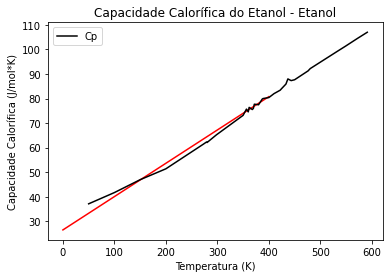

In [21]:
######################## Plotando os dados de capacidade calorífica do etanol ########################

fig = plt.figure()
ax1 = fig.add_subplot(111)

x = np.linspace(0, 400, 100)
y = b[0]*x + b[1]

plt.plot(x, y, c = 'red', label = 'Regressão Linear')
df_C_et.plot('Temperatura', 'Cp', ax=ax1, kind = 'line', color = 'black') # Plotando 
plt.title('Capacidade Calorífica do Etanol - Etanol') # Definindo título do gráfico
plt.xlabel('Temperatura (K)') # Definindo legendas dos eixos
plt.ylabel('Capacidade Calorífica (J/mol*K)')
plt.show() 

Portanto, a capacidade calorífica do etanol gasoso pode ser dada por:

$C_P(T)_{C_2H_5OH(g)} = 0.1356.T + 26.4895$

Dessa forma, a entropia do etanol gasoso à 379.54 K pode ser dada por:

$ S(379.54) = \int_{0}^{379.54}\frac{C_P(T)_{C_2H_5OH(g)}}{T}dT = \int_{0}^{379.54}\frac{0.1356.T + 26.4895}{T}dT $

$ S(379.54) = \int_{0}^{379.54}\frac{0.1356.T + 26.4895}{T}dT = 0.1356\int_{0}^{379.54} dT + 26.489\int_{0}^{379.54}\frac{1}{T}dT $

$ S(379.54) = 0.1356*379.54 + 26.489\log(379.54) - 26.489\log(0)$

Iremos desconsiderar o termo $ \log(0) $

Portanto,

$ S(379.54) = 0.1356*379.54 + 26.489\log(379.54) $

$ S(379.54) = 208.78 $

In [22]:
ENTROPIA_ETANOL = 208.78 # kJ/(mol*K)

ENTROPIA_AGUA = 69.95 # kJ/(mol*K)

ENTROPIA_OXIGENIO = 205.15 # kJ/(mol*K)

ENTROPIA_GAS_CARBONICO = 213.79 # kJ/(mol*K)

ENTROPIA_HIDROGENIO = 130.86 # kJ/(mol*K)

Fonte: https://www.nist.gov/

### Entropia de combustão do etanol

In [23]:
ENTROPIA_DE_COMBUSTAO_ETANOL_MOL = (2*(ENTROPIA_GAS_CARBONICO) + 3*(ENTROPIA_AGUA)) - (1*(ENTROPIA_ETANOL) + 3*(ENTROPIA_OXIGENIO))

ENTROPIA_DE_COMBUSTAO_ETANOL = ENTROPIA_DE_COMBUSTAO_ETANOL_MOL*N_MOLS_ETANOL

print(ENTROPIA_DE_COMBUSTAO_ETANOL)

-1399357.8467549377


In [24]:
ENTROPIA_COMBUSTAO_HIDROGENIO_MOL = ENTROPIA_AGUA - ((1/2)*ENTROPIA_OXIGENIO + ENTROPIA_HIDROGENIO)

ENTROPIA_COMBUSTAO_HIDROGENIO = ENTROPIA_COMBUSTAO_HIDROGENIO_MOL*N_MOLS_HIDROGENIO

print(ENTROPIA_COMBUSTAO_HIDROGENIO)

-3880335.9375


In [25]:
ENTROPIA_COMBUSTAO_TOTAL = ENTROPIA_DE_COMBUSTAO_ETANOL + ENTROPIA_COMBUSTAO_HIDROGENIO

print(ENTROPIA_COMBUSTAO_TOTAL)

-5279693.784254937


Portanto, a variação de entropia relativa ao processo de combustão da mistura de etanol e do hidrogênio corresponde à $-5279693.78 kJ/K$.

### Problema C

#### Objetivo

Determinar a equação de estado a ser usada para o sistema.


#### O que temos:
- Número de Mols dos reagentes
- Volume dos produtos
- Temperatura dos produtos

#### O que iremos fazer
- Encontrar o número de mols dos produtos
- Encontrar a pressão final

Durante o processo de combustão do etanol, é liberada uma quantidade de gás carbônico, a qual ocupa o espaço do recipiente, exercendo uma pressão. Para dimensionar a pressão que essa quantidade de $CO_2$ irá exercer, será utilizada a equação de estado $PV = nRT$, ou lei dos gases ideais, portanto, o comportamento do gás carbônico no recipiente será aproximado para o de um gás ideal.

In [26]:
N_MOLS_GAS_CARBONICO = N_MOLS_ETANOL*2 #mols

VOLUME_RECIPIENTE = 1000000 #l

TEMPERATURA = 298 #K

In [27]:
def pressao(n, V, T):
    R = 0.082
    return n*R*T/V

In [28]:
PRESSAO_HIDROGENIO = pressao(N_MOLS_HIDROGENIO, VOLUME_RECIPIENTE, TEMPERATURA)

PRESSAO_GAS_CARBONICO = pressao(N_MOLS_GAS_CARBONICO, VOLUME_RECIPIENTE, TEMPERATURA)

print(PRESSAO_HIDROGENIO, PRESSAO_GAS_CARBONICO)

0.579991369047619 0.36611036770132405


Portanto, se considerado que o ar atmosférico presente anteriormente à adição dos reagentes manteve-se e o hidrogênio passou a formar água no estado líquido, pode-se concluir que a pressão exercida pelo produto no estado final não ultrapassa o que foi atingido com os reagentes, sendo uma margem de segurança a pressão de 2 atm, pressupondo que, durante o processo, há a formação de vapor d'água.

# Acesse o repositório do projeto!

Para melhor compreensão de cade etapa e de cada escolha do nosso projeto, acesse, clicando aqui ou no link abaixo, nosso [Repositório do Github](**************), onde estão armazenados todos os notebooks e informações referentes aos desafios:

******************

#
## Referências
- Livro An Introduction to Thermal Physics, Daniel V. Schroeder, Editora Addison-Wesley.
- Livro Physical Chemistry: A Molecular Approach, Donald A. McQuarrie, Editora Univesity Science Books.
- Livro Richard Feynman, Lições de Física Vol 1, Editora Bookman.
        Capítulo de Teoria Cinética dos Gases